# Exporting Graphs and Visualization with NetworkX

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# Create the GraphiPy object
graphipy = GraphiPy()

# The reddit API needs these credentials
CLIENT_ID = ""
CLIENT_SECRET = ""
USER_AGENT = ""
USERNAME = ""
PASSWORD = ""
reddit_api_credentials = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "user_agent": USER_AGENT,
    "username": USERNAME,
    "password": PASSWORD
}

# Create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

In [3]:
# We will be looking at submission "9uolpb"
submission_id = "9uolpb"

# Dictionary Graph

In [4]:
gp_dict = graphipy.create_graph("dictionary")
gp_dict = reddit.fetch_submission_comments(gp_dict, submission_id, limit=8)

# Pandas Graph

In [5]:
gp_pd = graphipy.create_graph("pandas")
gp_pd = reddit.fetch_submission_comments(gp_pd, submission_id, limit=8)

# Neo4j Graph

In [6]:
neo4j_auth = ""
gp_neo = graphipy.create_graph("neo4j", neo4j_auth)
gp_neo = reddit.fetch_submission_comments(gp_neo, submission_id, limit=8)

# NetworkX Visualization

In [7]:
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [8]:
# Set up networkx exporter
exporter = graphipy.get_nx_exporter()

# Set up options
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}

In [9]:
# Create graph from dictionaries
d_nodes = gp_dict.get_nodes()
d_edges = gp_dict.get_edges()
nx_dict = exporter.create_from_dict(d_nodes, d_edges)

In [10]:
# Create graph from pandas
pd_nodes = gp_pd.get_nodes()
pd_edges = gp_pd.get_edges()
nx_pd = exporter.create_from_pd(pd_nodes, pd_edges)

In [11]:
# Create graph from neo4j
neo_nodes = gp_neo.get_nodes()
neo_edges = gp_neo.get_edges()
nx_neo = exporter.create_from_neo4j(neo_nodes, neo_edges)

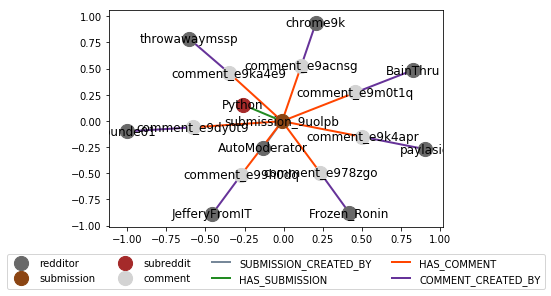

In [12]:
# Draw the dictionary graph
dict_legend = exporter.draw_random(nx_dict, options=options, legend=plt)

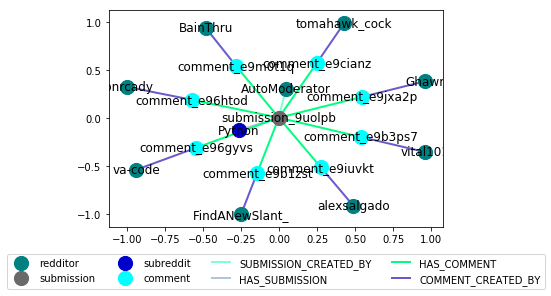

In [13]:
# Draw the pandas graph
pd_legend = exporter.draw_random(nx_pd, options=options, legend=plt)

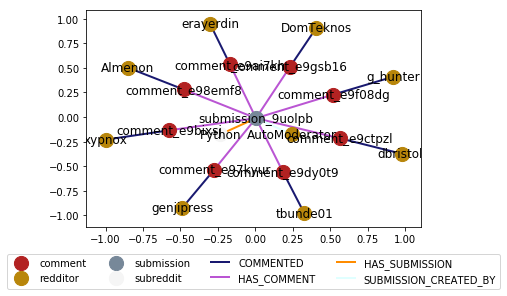

In [14]:
# Draw the neo4j graph
neo_legend = exporter.draw_random(nx_neo, options=options, legend=plt)

# Exporting Graphs as CSV Files

In [15]:
# export_all_csv returns the path to where the files are exported to
dictionary_path = gp_dict.export_all_csv("dictionary")
pandas_path = gp_pd.export_all_csv("pandas")
neo4j_path = gp_neo.export_all_csv("neo4j")

# Using CSV Files with NetworkX

In [16]:
# Provide path to CSV files
nx_dict_csv = exporter.create_from_csv(dictionary_path)
nx_pd_csv = exporter.create_from_csv(pandas_path)
nx_neo_csv = exporter.create_from_csv(neo4j_path)

# NetworkX Visualization

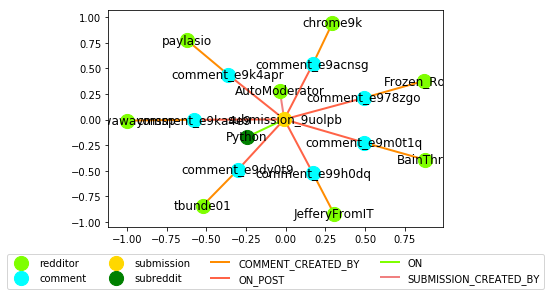

In [17]:
# Draw dictionary graph
nx_dict_legend = exporter.draw_random(nx_dict_csv, options=options, legend=plt)

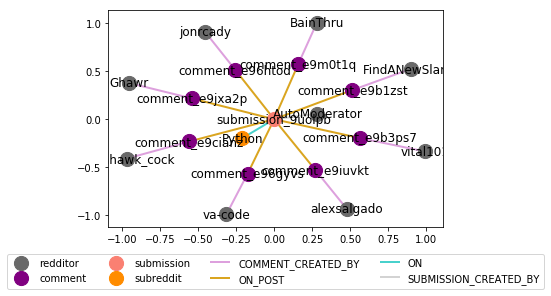

In [18]:
# Draw pandas graph
nx_pd_legend = exporter.draw_random(nx_pd_csv, options=options, legend=plt)

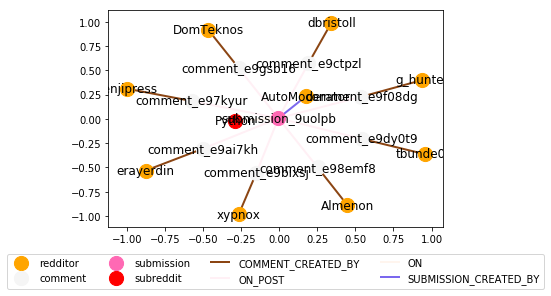

In [19]:
# Draw neo4j graph
nx_neo_legend = exporter.draw_random(nx_neo_csv, options=options, legend=plt)